In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
np.finfo(np.float)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore', category = DeprecationWarning)
import nltk
from nltk import word_tokenize
from datetime import datetime
import scipy.stats.distributions as dist


In [2]:
print(dir(pd))

['BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Float64Index', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int64Index', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt64Index', 'UInt8Dtype', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__getattr__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_hashtable', '_is_numpy_dev', '_lib', '_libs', '_np_version_under1p18', '_testing', '_tslib', '_typing', '_version', 'api', 'array', 'arrays', 'bdate_range', 'compat', 'con

In [3]:
pd.set_option('display.max_columns', None)

file = pd.read_csv(r'C:\Users\xuanx\Desktop\Steam_Reviews\steam_reviews.csv')

In [4]:
file['language'].value_counts()[:5]

english      9635437
schinese     3764967
russian      2348900
brazilian     837524
spanish       813320
Name: language, dtype: int64

In [5]:
#pick out english reviews only
df = file[file['language'] == 'english']

In [6]:
df['recommended'].value_counts()

True     8584444
False    1050993
Name: recommended, dtype: int64

In [7]:
#Checking review column for null values and removing them.
print(df.review.isnull().sum())
df1 = df[df.review.isnull()== False]

16750


In [8]:
df1

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,0.000000,0,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
5,5,292030,The Witcher 3: Wild Hunt,85184171,english,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,0,0.000000,0,True,False,False,76561198170193529,11,1,823.0,823.0,823.0,1.611379e+09
6,6,292030,The Witcher 3: Wild Hunt,85184064,english,"dis gud,",1611379091,1611379091,True,0,0,0.000000,0,True,False,False,76561198119302812,27,2,4192.0,3398.0,4192.0,1.611352e+09
18,18,292030,The Witcher 3: Wild Hunt,85180436,english,favorite game of all time cant wait for the Ne...,1611373086,1611373086,True,0,0,0.000000,0,True,False,False,76561198065591528,33,1,23329.0,177.0,23329.0,1.611219e+09
20,20,292030,The Witcher 3: Wild Hunt,85179753,english,Why wouldn't you get this,1611371978,1611371978,True,0,0,0.000000,0,True,False,False,76561198996835044,131,2,8557.0,2004.0,8557.0,1.611371e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747364,21747369,546560,Half-Life: Alyx,65645167,english,best game ever\n,1584986750,1584986750,True,0,0,0.000000,0,True,False,False,76561198817267089,86,8,1055.0,14.0,45.0,1.611138e+09
21747366,21747371,546560,Half-Life: Alyx,65645125,english,Holy balls,1584986704,1584986704,True,0,0,0.000000,0,True,False,False,76561197967033932,431,7,432.0,0.0,29.0,1.586628e+09
21747367,21747372,546560,Half-Life: Alyx,65645115,english,"A tripod thing bears down on you, it looks imm...",1584986693,1584986693,True,0,0,0.000000,0,False,False,False,76561198046495482,70,10,3296.0,15.0,24.0,1.611080e+09
21747368,21747373,546560,Half-Life: Alyx,65645100,english,Honestly this is the best vr game ever,1584986673,1584986673,True,0,0,0.474138,0,True,False,False,76561198176379749,79,17,2654.0,0.0,34.0,1.591634e+09


In [9]:
games_list = df['app_name'].value_counts().to_frame()
print(games_list.index.to_frame())

                                                                           0
Tom Clancy's Rainbow Six Siege                Tom Clancy's Rainbow Six Siege
Terraria                                                            Terraria
Garry's Mod                                                      Garry's Mod
Grand Theft Auto V                                        Grand Theft Auto V
PLAYERUNKNOWN'S BATTLEGROUNDS                  PLAYERUNKNOWN'S BATTLEGROUNDS
...                                                                      ...
DRAGON QUEST HEROES™ II                              DRAGON QUEST HEROES™ II
Senren＊Banka                                                    Senren＊Banka
Battle Royale Trainer                                  Battle Royale Trainer
三国群英传8 Heroes of the Three Kingdoms 8  三国群英传8 Heroes of the Three Kingdoms 8
Neon Hardcorps                                                Neon Hardcorps

[315 rows x 1 columns]


In [10]:
games_list_20 = games_list.sample(frac=0.03, random_state = 40)
games_list_20.shape

(9, 1)

In [11]:
#showing games in our sample of data
games_list_20_list = games_list_20.index.tolist()
df_20 = df.loc[(df['app_name'].isin(games_list_20_list))]

In [12]:
df_20.shape

(263815, 23)

In [13]:
df_20['app_name'].value_counts()

ARK: Survival Evolved           184576
Deep Rock Galactic               47002
Assassin's Creed Origins         17832
Avorion                           5056
FAR: Lone Sails                   3834
Titan Souls                       2633
Iconoclasts                       1492
SENRAN KAGURA ESTIVAL VERSUS      1119
Senren＊Banka                       271
Name: app_name, dtype: int64

In [14]:
#df_20_20 = df_20.sample(frac = 0.1)
df_20_20 = df_20.sample(frac = 0.1, random_state = 40)
#df_20_20['recommended'].value_counts()
#df_20_20 = df_20

In [15]:
df_20_20['recommended'].value_counts()

True     21141
False     5241
Name: recommended, dtype: int64

In [16]:
#Hypothesis testing: early access population mean versus release reviews means
df_20_20.groupby('written_during_early_access')['recommended'].value_counts()

written_during_early_access  recommended
False                        True           14424
                             False           2644
True                         True            6717
                             False           2597
Name: recommended, dtype: int64

In [17]:
prop = df_20_20.groupby('written_during_early_access')['recommended'].value_counts(normalize = True)
prop

written_during_early_access  recommended
False                        True           0.845090
                             False          0.154910
True                         True           0.721172
                             False          0.278828
Name: recommended, dtype: float64

In [18]:
n = df_20_20.groupby('written_during_early_access')['recommended'].count()
n

written_during_early_access
False    17068
True      9314
Name: recommended, dtype: int64

In [19]:
prop_early = prop[(True, False)]
prop_not_early = prop[(False, False)]
print(prop_early, prop_not_early)

0.27882757139789566 0.15490977267400985


In [20]:
n_early = n[True]
n_not_early = n[False]
print(n_early, n_not_early)

9314 17068


In [21]:
p_hat = (n_early * prop_early + n_not_early * prop_not_early) / (n_early + n_not_early)
std_error = np.sqrt(p_hat * (1-p_hat) / n_early + p_hat * (1-p_hat) / n_not_early)
z_score = (prop_early - prop_not_early) / std_error
print(z_score)

24.108885753632578


In [22]:
n_not_recommended = np.array([2644, 2597])
n_row = np.array([14424 + 2644, 6717 + 2597])
from statsmodels.stats.proportion import proportions_ztest
z_score, p_value = proportions_ztest(count = n_not_recommended, nobs = n_row, alternative = 'two-sided')
z_score, p_value

#Reject null hypothesis.
#There is a difference in proportion between not recommended reviews in early access and not recommended reviews outside
# of early access at a 1% level of significance. 

(-24.108885753632578, 2.0170192587670853e-128)

In [23]:
#received for free population reviews versus paid population reviews

df_20_20.groupby('received_for_free')['recommended'].value_counts()

received_for_free  recommended
False              True           20592
                   False           5142
True               True             549
                   False             99
Name: recommended, dtype: int64

In [24]:
#received for free population = to paid population reviews?
rec_free_key = np.array([549, 20592])
n_row = np.array([549+99, 20592+5142])
from statsmodels.stats.proportion import proportions_ztest
z_score, p_value = proportions_ztest(count = n_not_recommended, nobs = n_row, alternative = 'larger')
z_score, p_value

(250.74662992839066, 0.0)

In [25]:
df_20_20.review = df_20_20.review.astype(str)

In [26]:
import string
import re

In [27]:
#Convert text to lowercase and removing punctuation 

def remove_punct(txt):
    text_input = "".join([char for char in txt if char not in string.punctuation])
    return text_input

df_20_20['token_review'] = df_20_20['review'].apply(lambda x: remove_punct(x.lower()))

In [28]:
#remove numbers

def remove_digits(txt):
    return re.sub(r' \d+', '', str(txt))

df_20_20['token_review1'] = df_20_20['token_review'].apply(lambda x: remove_digits(x))

In [29]:
#remove non alphabet characters

def remove_chars(txt):
    return re.sub("[^a-zA-Z]+", ' ', txt)

df_20_20['token_review2'] = df_20_20['token_review1'].apply(lambda x: remove_chars(x))

In [30]:
#Convert reviews into tokens

def tokenize(txt):
    tokens = re.split('\W+', txt)
    return tokens

df_20_20['token_review3'] = df_20_20['token_review2'].apply(lambda x: tokenize(x))

In [31]:
#remove stopwords

stopword = nltk.corpus.stopwords.words('english')

def rem_stopwords(txt):
    text = [word for word in txt if word not in stopword]
    return text

df_20_20['token_review4'] = df_20_20['token_review3'].apply(lambda x: rem_stopwords(x))
    

In [32]:
#convert words to base form 
wn = nltk.WordNetLemmatizer()

def lemmatizer(txt):
    text = [wn.lemmatize(word) for word in txt]
    return text

df_20_20['token_review5']=df_20_20['token_review4'].apply(lambda x: lemmatizer(x))

In [33]:
df_20_20['reviews_fin'] = df_20_20['token_review5'].apply(lambda x:' '.join(x))
df_20_20['rec_var'] = df_20_20['recommended'].apply(lambda x: 0 if x==1 else 1)

In [34]:
pos_reviews = df_20_20[df_20_20['rec_var']== 0] #majority variable positive reviews
neg_reviews = df_20_20[df_20_20['rec_var']== 1] #minority variable negative reviews

In [35]:
print(pos_reviews['review'].count(),
    neg_reviews['review'].count())

21141 5241


In [36]:
from nltk.probability import FreqDist

pos_rev_words = pos_reviews['token_review5']
pos_words = []
for reviews in pos_rev_words: 
    pos_words += reviews
    
freqdist_pos = FreqDist(pos_words)
freqdist_pos

FreqDist({'game': 27855, 'fun': 5668, 'good': 5162, 'play': 4804, 'like': 4681, 'get': 4157, 'great': 3909, 'time': 3696, '': 3017, 'friend': 3002, ...})

In [37]:
neg_rev_words = neg_reviews['token_review5']
neg_words = []
for reviews in neg_rev_words: 
    neg_words += reviews
    
freqdist_neg = FreqDist(neg_words)
freqdist_neg

FreqDist({'game': 11380, 'server': 1996, 'get': 1968, 'time': 1861, 'like': 1736, 'play': 1730, 'even': 1681, 'dont': 1582, 'hour': 1230, 'one': 1060, ...})

<function matplotlib.pyplot.show(*args, **kw)>

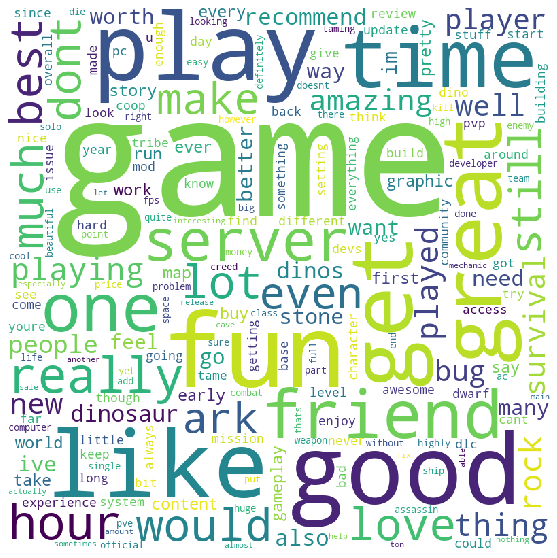

In [38]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     stopwords = stopword,
                     min_font_size = 10).generate_from_frequencies(freqdist_pos)

plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('postive.png')
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

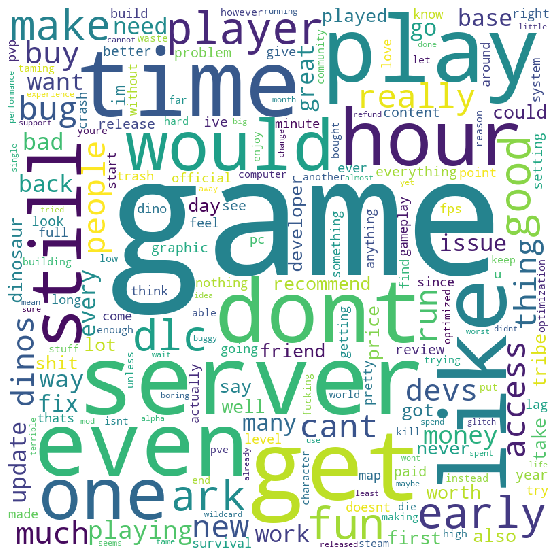

In [39]:
wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     stopwords = stopword,
                     min_font_size = 10).generate_from_frequencies(freqdist_neg)

plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('negative.png')
plt.show


In [40]:
(pd.Series(nltk.ngrams(pos_words, 2)).value_counts())[:10]

(great, game)       1476
(rock, stone)       1306
(good, game)        1295
(survival, game)     949
(early, access)      909
(fun, game)          844
(love, game)         721
(best, game)         689
(game, play)         645
(game, great)        535
dtype: int64

In [41]:
(pd.Series(nltk.ngrams(pos_words, 3)).value_counts())[:10]

(stone, rock, stone)        525
(rock, stone, rock)         522
(best, game, ever)          282
(early, access, game)       270
(one, best, game)           197
(ark, survival, evolved)    185
(game, play, friend)        181
(best, survival, game)      172
(deep, rock, galactic)      170
(trex, trex, trex)          170
dtype: int64

In [42]:
(pd.Series(nltk.ngrams(neg_words, 2)).value_counts())[:10]

(early, access)       822
(play, game)          283
(paid, dlc)           265
(trash, trash)        245
(buy, game)           233
(access, game)        208
(recommend, game)     207
(official, server)    205
(game, still)         205
(dont, buy)           193
dtype: int64

In [43]:
(pd.Series(nltk.ngrams(neg_words, 3)).value_counts())[:10]

(trash, trash, trash)       241
(early, access, game)       204
(dlc, early, access)        100
(bug, bug, bug)              83
(game, early, access)        82
(still, early, access)       69
(ark, survival, evolved)     61
(paid, dlc, early)           59
(dont, buy, game)            57
(cant, even, play)           40
dtype: int64

In [44]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [45]:
df_x = df_20_20['reviews_fin']
y = df_20_20['rec_var']
X_train, X_test, y_train, y_test = train_test_split(df_x, y, 
                                                    test_size = 0.2, random_state = 42)


In [46]:
import xgboost

In [47]:
vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_features.shape, test_vectors.shape)

(21105, 28199) (5277, 28199)


In [48]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from time import time
from pprint import pprint
import logging
from sklearn.metrics import recall_score, roc_auc_score, make_scorer, roc_curve

Performing Model Optimizations

Estimator: Naive Bayes
Best params are : {'vect__ngram_range': (1, 1)}
Best training AUC score: 0.867
Test set AUC score for best params: 0.879 


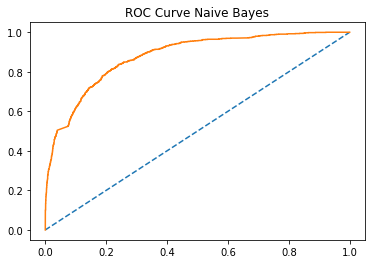


Estimator: Random Forest
Best params are : {'clf__max_depth': 100, 'clf__n_estimators': 800, 'vect__ngram_range': (1, 1)}
Best training AUC score: 0.902
Test set AUC score for best params: 0.904 


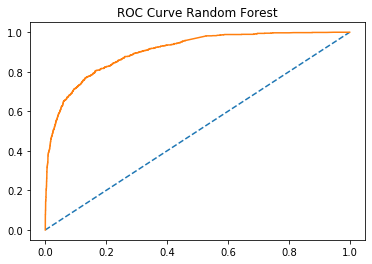


Classifier with best test set AUC: Random Forest


In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

cv = KFold(n_splits=5)


pipe_multi = Pipeline([('vect', TfidfVectorizer()),
                      ('clf', MultinomialNB())])

pipe_rf = Pipeline([('vect', TfidfVectorizer()),
                      ('clf', RandomForestClassifier(random_state = 42))])


grid_params_multi = {'vect__ngram_range': [(1,1), (2,2), (3,3)]
                     }

grid_params_rf = {'vect__ngram_range': [(1,1), (2,2), (3,3)],
                  'clf__max_depth': [10, 20, 50, 100],
                  'clf__n_estimators': [200, 400, 600, 800]
                     }

multiNB = GridSearchCV(estimator = pipe_multi,
                      param_grid = grid_params_multi,
                      scoring = 'roc_auc',
                      cv = cv, 
                       n_jobs = -1)

rf = GridSearchCV(estimator = pipe_rf,
                  param_grid = grid_params_rf,
                  scoring = 'roc_auc',
                  cv = cv, 
                  n_jobs = -1)

grids = [multiNB, rf] #rf

grid_dict = {0: 'Naive Bayes',
            1: 'Random Forest'}

print('Performing Model Optimizations')
best_auc = 0.0
best_clf = 0
best_gs = ''

for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(X_train, y_train)
    print('Best params are : %s' % gs.best_params_)
    # Best training data recall score
    print('Best training AUC score: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred_proba = gs.predict_proba(X_test)[:,1]
    # Test data accuracy of model with best params
    print('Test set AUC score for best params: %.3f ' % roc_auc_score(y_test, y_pred_proba))
    #Plot ROC curve for each estimator
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test,y_pred_proba)
    plt.plot([0,1],[0,1], linestyle ='--')
    plt.plot(fpr, tpr, label = 'auc=%.3f' % auc)
    plt.title(label = 'ROC Curve %s' % grid_dict[idx])
    name = grid_dict[idx]
    plt.savefig(name + ".png")
    plt.show()
    # Track best (highest test auc) model
    if roc_auc_score(y_test, y_pred_proba) > best_auc:
        best_auc = roc_auc_score(y_test, y_pred_proba)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set AUC: %s' % grid_dict[best_clf])




In [50]:
print(rf.best_params_)

{'clf__max_depth': 100, 'clf__n_estimators': 800, 'vect__ngram_range': (1, 1)}


In [51]:
vectorizer = TfidfVectorizer(ngram_range = (1,1))
X_train_vec = vectorizer.fit_transform(X_train)
X_train_vec_df = pd.DataFrame(X_train_vec.toarray())
X_test_vec = vectorizer.transform(X_test)
X_test_vec_df = pd.DataFrame(X_test_vec.toarray())


In [52]:
words = vectorizer.get_feature_names()

In [53]:
X_train_vec_df.columns = words
X_test_vec_df.columns = words

In [54]:
clf = RandomForestClassifier(random_state = 42, max_depth= 100, n_estimators= 800)
clf_fit = clf.fit(X_train_vec_df, y_train)


In [55]:
import shap

In [56]:
from scipy import interpolate
from sklearn import metrics

In [57]:
explainer = shap.TreeExplainer(clf_fit, X_train_vec_df, feature_names = words)
shap_values = explainer(X_test_vec_df)
print(shap_values.values.shape)

100%|===================| 10553/10554 [103:46<00:00]        

(5277, 28199, 2)


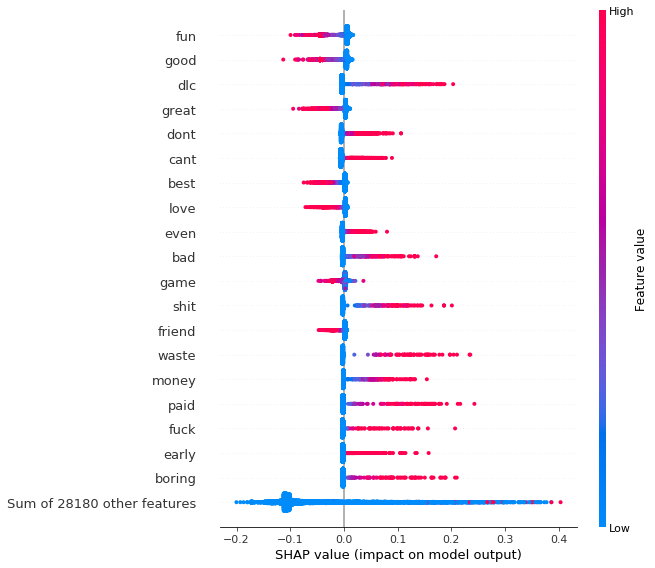

In [58]:
import copy

shap.initjs()
shap_values1 = copy.deepcopy(shap_values)
shap_values1.values = shap_values1.values[:,:,1]
shap_values1.base_values = shap_values1.base_values[:,1]

shap.plots.beeswarm(shap_values1, max_display = 20, show= False)
plt.savefig('beeswarm.png', bbox_inches="tight")

In [59]:
shap.initjs()

ind = 48
print(X_test.iloc[ind], y_test.iloc[ind])

love game game devs active always adding thing fixing problem quickly 0


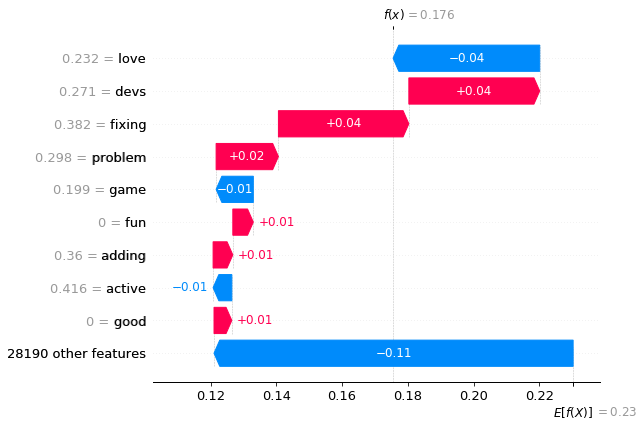

In [60]:
shap.plots.waterfall(shap_values[ind,:,1], show = False)
plt.savefig('waterfall.png', bbox_inches="tight")

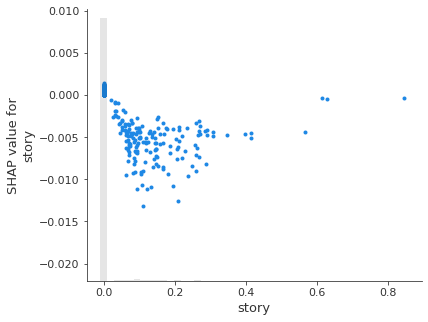

In [61]:
shap.plots.scatter(shap_values[:,words.index('story'),1], show = False)
plt.savefig('scatter.png', bbox_inches="tight")

In [62]:
y_test.value_counts()

0    4234
1    1043
Name: rec_var, dtype: int64

In [63]:
feature_scores = pd.Series(clf_fit.feature_importances_,
                          index = words).sort_values(ascending=False)
feature_scores[:10]


dlc      0.014515
game     0.011272
fun      0.010542
paid     0.009908
dont     0.009781
money    0.009055
shit     0.008996
good     0.008821
even     0.007964
waste    0.007758
dtype: float64

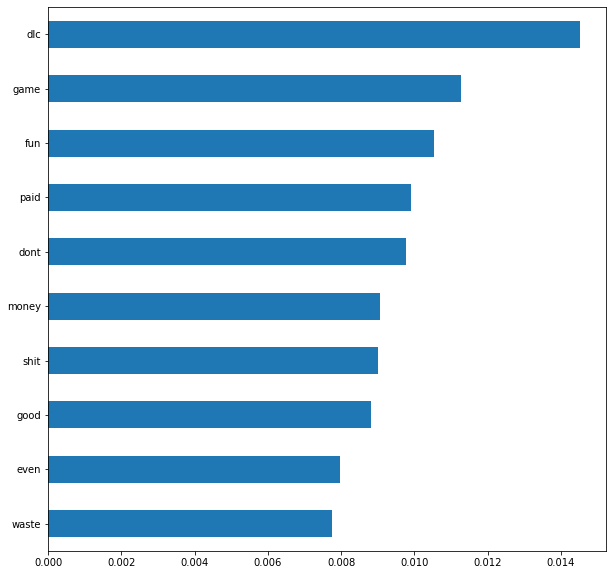

In [64]:
feat_imp = feature_scores.nlargest(10).sort_values(ascending=True)
feat_imp.plot(kind = 'barh', figsize = (10,10))
plt.savefig('feat_imp.png', bbox_inches="tight")

Best Threshold = 0.327631, F-Score = 0.687


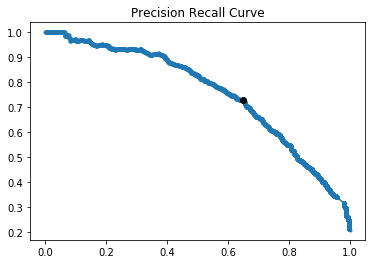

In [65]:
from sklearn.metrics import precision_recall_curve

y_pred_proba = clf_fit.predict_proba(X_test_vec_df)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print('Best Threshold = %f, F-Score = %.3f' % (thresholds[ix], fscore[ix]))
plt.plot(recall, precision, label = 'auc=%.3f' % auc, marker = '.')
plt.plot(recall[ix], precision[ix], marker = 'o', color = 'black', label = 'Best')
plt.title(label = 'Precision Recall Curve')
plt.savefig('prec_recall.png', bbox_inches="tight")
plt.show()
optimal_thresh = thresholds[ix]
optimal_prec = precision[ix]

In [66]:
from sklearn.metrics import confusion_matrix

y_pred = (y_pred_proba > optimal_thresh)
conf_mat = confusion_matrix(y_test, y_pred.astype(int), labels = [1,0])
conf_mat

array([[ 678,  365],
       [ 254, 3980]], dtype=int64)

In [67]:
print(X_test.shape)
y_pred_df = y_pred.astype(int)
X_variables = pd.DataFrame(X_test)
X_variables['predictions'] = y_pred_df

(5277,)


In [68]:
negative_reviews = X_variables[X_variables['predictions'] == 1 ]
negative_reviews.head(10)


,reviews_fin,predictions
16656416,paid dlc game isnt remotely finished doesnt he...,1
16651940,waiting seen game review going positive potent...,1
16668207,helo welcome biggest scamm life never scammed ...,1
16678949,mind early access thing may change playing pvp...,1
16367233,spectacularly fun game work hour playing inclu...,1
16695108,say lagging playing game admins optimize syste...,1
16568856,game huge fun timesink solo ive enjoyed every ...,1
16643339,recommend game one reason onlyand thats optimi...,1
16086241,itdoesntfuckingwork constant crash audio issue...,1
16679639,although play game mac recommended willing pur...,1


In [69]:
negative_reviews.count()

reviews_fin    932
predictions    932
dtype: int64

In [70]:
X_variables.iloc[ind]

reviews_fin    love game game devs active always adding thing...
predictions                                                    0
Name: 19597668, dtype: object

In [71]:
#neural network
!pip install tensorflow

In [72]:
import tensorflow.keras

In [73]:
X_train_arr = train_features.toarray()

In [74]:
X_test_arr = test_vectors.toarray()

In [75]:
print(X_train_arr.shape, X_test_arr.shape)

(21105, 28199) (5277, 28199)


In [76]:
n_words = X_train_arr.shape[1]
n_words

28199

In [77]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from keras.callbacks import TensorBoard
import datetime

In [78]:
#nn model
model = Sequential()
model.add(Dense(100, input_shape = (n_words,), activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation ='sigmoid'))

tensorBoardCallback = TensorBoard(log_dir = './logs', write_graph = True)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [79]:
start_time = datetime.datetime.now()

history = model.fit(X_train_arr, y_train, epochs = 100, callbacks=[tensorBoardCallback], verbose = 2,
                   validation_data = (X_test_arr, y_test))



Epoch 1/100
660/660 - 54s - loss: 0.3008 - accuracy: 0.8758 - val_loss: 0.2499 - val_accuracy: 0.8973 - 54s/epoch - 81ms/step
Epoch 2/100
660/660 - 24s - loss: 0.1611 - accuracy: 0.9375 - val_loss: 0.2810 - val_accuracy: 0.8916 - 24s/epoch - 37ms/step
Epoch 3/100
660/660 - 25s - loss: 0.0976 - accuracy: 0.9647 - val_loss: 0.3416 - val_accuracy: 0.8916 - 25s/epoch - 38ms/step
Epoch 4/100
660/660 - 25s - loss: 0.0617 - accuracy: 0.9792 - val_loss: 0.3812 - val_accuracy: 0.8831 - 25s/epoch - 37ms/step
Epoch 5/100
660/660 - 24s - loss: 0.0440 - accuracy: 0.9855 - val_loss: 0.5152 - val_accuracy: 0.8867 - 24s/epoch - 37ms/step
Epoch 6/100
660/660 - 25s - loss: 0.0345 - accuracy: 0.9885 - val_loss: 0.5627 - val_accuracy: 0.8842 - 25s/epoch - 38ms/step
Epoch 7/100
660/660 - 25s - loss: 0.0295 - accuracy: 0.9901 - val_loss: 0.6190 - val_accuracy: 0.8857 - 25s/epoch - 38ms/step
Epoch 8/100
660/660 - 25s - loss: 0.0269 - accuracy: 0.9910 - val_loss: 0.6721 - val_accuracy: 0.8835 - 25s/epoch - 37

Epoch 66/100
660/660 - 23s - loss: 0.0183 - accuracy: 0.9938 - val_loss: 1.1871 - val_accuracy: 0.8730 - 23s/epoch - 35ms/step
Epoch 67/100
660/660 - 23s - loss: 0.0174 - accuracy: 0.9941 - val_loss: 1.2736 - val_accuracy: 0.8734 - 23s/epoch - 35ms/step
Epoch 68/100
660/660 - 23s - loss: 0.0183 - accuracy: 0.9938 - val_loss: 1.1921 - val_accuracy: 0.8764 - 23s/epoch - 35ms/step
Epoch 69/100
660/660 - 23s - loss: 0.0171 - accuracy: 0.9940 - val_loss: 1.2429 - val_accuracy: 0.8740 - 23s/epoch - 35ms/step
Epoch 70/100
660/660 - 23s - loss: 0.0173 - accuracy: 0.9942 - val_loss: 1.2044 - val_accuracy: 0.8753 - 23s/epoch - 35ms/step
Epoch 71/100
660/660 - 23s - loss: 0.0182 - accuracy: 0.9937 - val_loss: 1.2206 - val_accuracy: 0.8685 - 23s/epoch - 35ms/step
Epoch 72/100
660/660 - 23s - loss: 0.0171 - accuracy: 0.9942 - val_loss: 1.2148 - val_accuracy: 0.8728 - 23s/epoch - 35ms/step
Epoch 73/100
660/660 - 23s - loss: 0.0181 - accuracy: 0.9938 - val_loss: 1.2447 - val_accuracy: 0.8751 - 23s/ep

In [80]:
loss, acc = model.evaluate(X_test_arr, y_test, verbose = 0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 87.852949


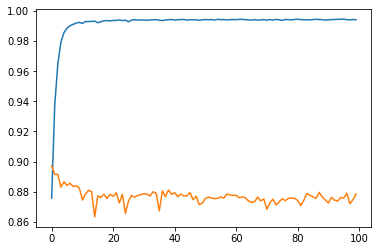

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

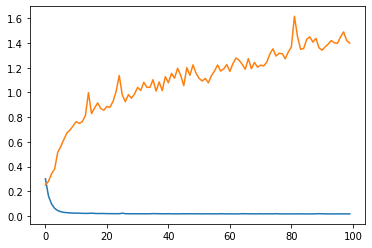

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## Unused Code For Now

In [83]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

In [84]:
precision.shape, recall.shape, thresholds.shape

((4120,), (4120,), (4119,))

In [85]:
precision = np.delete(precision, -1)
recall = np.delete(recall, -1)

precision.shape, recall.shape, thresholds.shape

((4119,), (4119,), (4119,))

In [86]:
#locate recall from selected precision

precision_score = optimal_prec
find_recall = interpolate.interp1d(precision, recall)
find_thresh = interpolate.interp1d(precision, thresholds)
thresh_value = find_thresh(precision_score)
recall_score = find_recall(precision_score)
recall_score, thresh_value

(array(0.65100671), array(0.32763117))

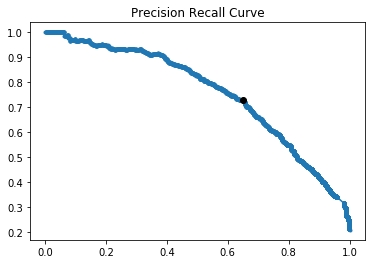

In [87]:
plt.plot(recall, precision, label = 'auc=%.3f' % auc, marker = '.')
plt.plot(recall_score, precision_score, marker = 'o', color = 'black', label = 'Best')
plt.title(label = 'Precision Recall Curve')
plt.show()


In [88]:
tpr_opt = find_tpr(thresh_value)
fpr_opt = find_fpr(thresh_value)
print(tpr_opt, fpr_opt, thresh_value)

NameError: name 'find_tpr' is not defined

In [ ]:
#locating optimal point
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

find_tpr = interpolate.interp1d(thresholds, tpr) #plug in thresholds for tpr
find_fpr = interpolate.interp1d(thresholds, fpr) #plug in thresh for fpr
thresh_look = interpolate.interp1d(tpr, thresholds) #plug in tpr for thresholds


In [ ]:
ttt = thresh_look(0.6) #threshold value for value of tpr
ttt

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test,y_pred_proba)
plt.plot([0,1],[0,1], linestyle ='--')
plt.plot(fpr, tpr, label = 'auc=%.3f' % auc, marker = '.')
plt.plot(fpr_opt, tpr_opt, marker = 'o', color = 'black')
plt.title(label = 'ROC Curve Random Forest Classifier')
plt.show()

In [ ]:
y_pred_opt = (y_pred_proba > ttt)
conf_mat_opt = confusion_matrix(y_test, y_pred_opt, labels = [0,1])
conf_mat_opt

In [ ]:
#find best true negative (tn) results
tn = 7000
best_thresh = 0
for t in high_thresh:
    y_pred_opt = (y_pred_proba > t)
    conf_mat_opt = confusion_matrix(y_test, y_pred_opt, labels = [0,1])
    if conf_mat_opt[1][0] > tn:
        best_thresh = t
        tn = conf_mat_opt[1][0]
        conf_mat_best = conf_mat_opt

best_thresh, tn, conf_mat_best

In [ ]:
high_thresh = thresholds[thresholds > 0.5]
high_thresh

In [ ]:
from sklearn.metrics import accuracy_score

#accuracy prior to choosing threshold
accuracy = accuracy_score(y_test, y_pred_proba.astype('int'))
print(accuracy)

In [ ]:
y_pred = y_pred_proba
y_pred = (y_pred >= opt_thresh).astype('int')

accuracy_thresh = accuracy_score(y_test, y_pred)
print(accuracy_thresh)

In [ ]:
plt.plot(recall, precision, label = 'auc=%.3f' % auc, marker = '.')
plt.plot(0.9, prec_point, marker = 'o', color = 'black', label = 'Best')
plt.title(label = 'Precision Recall Curve')
plt.show()
